In [2]:
from astropy.table import Table
import matplotlib.pyplot as plt
import numpy as np

## ELAIS

In [7]:
cat_elais = Table.read('CUT_deep_catalogs/CUT_ELAIS.fits')
cat_elais.info()
cat_gal_elais = cat_elais[cat_elais['preds_median']<0.89]

<Table masked=True length=1335423>
    name      dtype 
------------ -------
      NUMBER   int64
          RA float64
         DEC float64
    zKDEPeak float64
      zKDE16 float64
  zKDEMedian float64
      zKDE84 float64
   MASS_BEST float64
    MASS_MED float64
   SSFR_BEST float64
    SSFR_MED float64
preds_median float32
      sfProb float64
       dzm_q float64
      dzm_sf float64


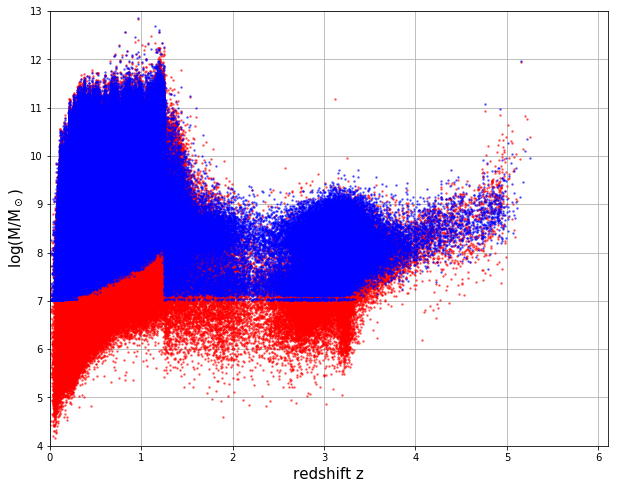

In [12]:
fig = plt.figure(figsize=(10,8))
plt.plot(cat_gal_elais['zKDEPeak'],cat_gal_elais['MASS_BEST'],'.r',markersize=3, alpha=0.5)
plt.plot(cat_gal_elais['zKDEPeak'],cat_gal_elais['MASS_MED'],'.b',markersize=3, alpha=0.5)

plt.ylim([4,13])
plt.xlim([0,6.1])
plt.xlabel('redshift z', fontsize=15)
plt.ylabel(r'log(M/M$_\odot$)', fontsize=15)
plt.grid(True)
plt.savefig('deep_fields_stats/completeness_elais.png')
plt.show()

In [9]:
cat_deep = Table.read('CUT_deep_catalogs/CUT_DEEP.fits')
cat_deep.info()
cat_gal_deep = cat_deep[cat_deep['preds_median']<0.89]

<Table masked=True length=1441537>
    name      dtype 
------------ -------
      NUMBER   int64
          RA float64
         DEC float64
    zKDEPeak float64
      zKDE16 float64
  zKDEMedian float64
      zKDE84 float64
   MASS_BEST float64
    MASS_MED float64
   SSFR_BEST float64
    SSFR_MED float64
preds_median float32
      sfProb float64
       dzm_q float64
      dzm_sf float64


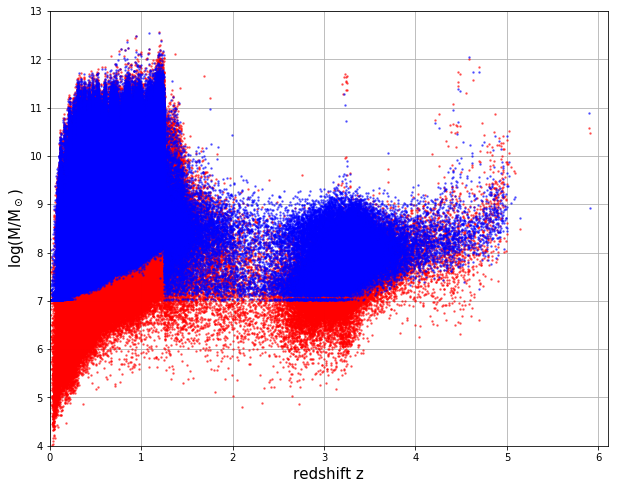

In [11]:
fig = plt.figure(figsize=(10,8))
plt.plot(cat_gal_deep['zKDEPeak'],cat_gal_deep['MASS_BEST'],'.r',markersize=3, alpha=0.5)
plt.plot(cat_gal_deep['zKDEPeak'],cat_gal_deep['MASS_MED'],'.b',markersize=3, alpha=0.5)

plt.ylim([4,13])
plt.xlim([0,6.1])
plt.xlabel('redshift z', fontsize=15)
plt.ylabel(r'log(M/M$_\odot$)', fontsize=15)
plt.grid(True)
plt.savefig('deep_fields_stats/completeness_deep.png')
plt.show()

In [30]:
from astropy.cosmology import WMAP9

In [54]:
m_mean = np.array([])
for z in np.arange(3,10)/10.:
    dis_l = WMAP9.comoving_distance(z-0.1).value
    dis_h = WMAP9.comoving_distance(z+0.1).value
    
    total_v = 4/3*np.pi*(dis_h**3 - dis_l**3) # Mpc^3
    survey_v = total_v * 3.5 / 41253.05  #Mpc^3
    density = 0.00003 # Mpc^-3
    num = int(density*survey_v)  # surface densisty propto dis**2
    print(num)
    
    cat_gal_z_slice = cat_gal[abs(cat_gal['zKDEMedian']-z)<0.1]
    cat_gal_z_slice.sort('MASS_MED')
    cat_gal_z_slice.reverse()
    cat_massive_gal_z = cat_gal_z_slice[:num]
    print(cat_massive_gal_z['MASS_MED'])
    m_mean = np.append(m_mean, sum( 10**(cat_massive_gal_z['MASS_MED'] - 10))/len(cat_massive_gal_z))

26
MASS_MED
--------
 11.6071
  11.589
 11.5772
 11.5706
 11.5639
 11.5576
 11.5462
 11.5395
 11.5389
 11.5251
     ...
 11.4625
 11.4614
  11.458
 11.4548
 11.4421
 11.4406
 11.4356
 11.4333
 11.4317
 11.4259
  11.425
Length = 26 rows
42
MASS_MED
--------
 11.7074
 11.6485
 11.6237
  11.615
 11.6071
 11.6018
  11.589
 11.5772
 11.5744
 11.5706
     ...
  11.458
 11.4556
 11.4548
 11.4449
 11.4441
 11.4427
 11.4421
 11.4406
  11.437
 11.4359
 11.4356
Length = 42 rows
58
MASS_MED
--------
 11.7074
 11.7063
 11.6771
 11.6485
  11.648
 11.6237
  11.615
 11.6105
 11.6018
 11.5744
     ...
 11.4009
 11.3986
 11.3958
 11.3944
 11.3915
 11.3914
 11.3903
 11.3892
 11.3879
 11.3874
 11.3827
Length = 58 rows
75
MASS_MED
--------
 11.9221
 11.7576
 11.7308
 11.7154
 11.7063
 11.6771
 11.6739
 11.6643
  11.648
 11.6435
     ...
 11.4276
 11.4271
 11.4271
 11.4255
 11.4244
 11.4241
  11.424
 11.4236
  11.423
 11.4215
 11.4186
Length = 75 rows
92
MASS_MED
--------
 12.0681
   12.05
 11.9477
 11.9221

In [52]:
print(m_mean)

[31.61309005 33.13027535 30.97436435 34.25499801 36.11863787 42.2008051
 45.1179709 ]


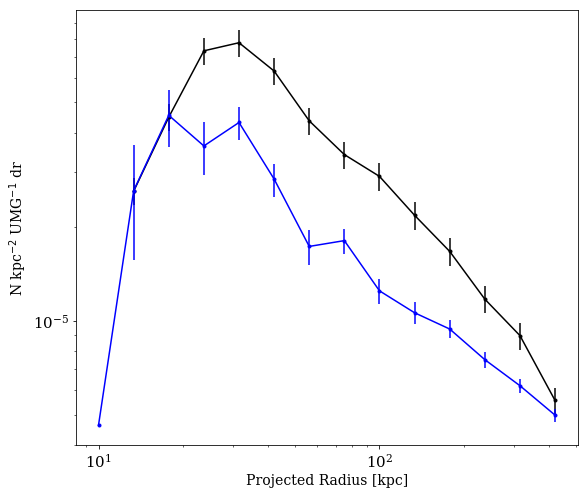

In [21]:
radial_COSMOS_d = np.load('CUT_deep_catalogs/countCOSMOS_d.npy') #669
radial_COSMOS_uddd = np.load('CUT_deep_catalogs/countCOSMOS_uddd.npy')  # 219
radial_XMM = np.load('CUT_deep_catalogs/countXMM.npy')  # 518
radial_ELAIS = np.load('CUT_deep_catalogs/countELAIS.npy')  # 449
radial_SXDS_uddd = np.load('CUT_deep_catalogs/countSXDS_uddd.npy')  # 196
radial_DEEP = np.load('CUT_deep_catalogs/countDEEP.npy')  #  515

radial_COSMOS_d_err = np.load('CUT_deep_catalogs/countCOSMOS_d_err.npy')
radial_COSMOS_uddd_err = np.load('CUT_deep_catalogs/countCOSMOS_uddd_err.npy')
radial_XMM_err = np.load('CUT_deep_catalogs/countXMM_err.npy')
radial_ELAIS_err = np.load('CUT_deep_catalogs/countELAIS_err.npy')
radial_SXDS_uddd_err = np.load('CUT_deep_catalogs/countSXDS_uddd_err.npy')
radial_DEEP_err = np.load('CUT_deep_catalogs/countDEEP_err.npy')

radial_ud = np.load('count0.6.npy')  
radial_ud_err = np.load('count0.6_err.npy')

bin_edges = np.load('CUT_deep_catalogs/bin_edges.npy')

radial_total = (radial_COSMOS_d*669+radial_COSMOS_uddd*219+radial_XMM*518+radial_ELAIS*449+radial_SXDS_uddd*196+radial_DEEP*515)/(669.+219+518+449+196+515)
# radial_total_err = 

fig = plt.figure(figsize=(9, 8))
plt.rc('font', family='serif'), plt.rc('xtick', labelsize=15), plt.rc('ytick', labelsize=15)
plt.errorbar(bin_edges[:-1], radial_total, fmt='.-k', yerr=radial_total/10.)
plt.errorbar(bin_edges[:-1], radial_ud, fmt='.-b', yerr=radial_ud_err)
plt.xscale('log')
plt.yscale('log')
plt.legend(fontsize=14)
plt.xlabel('Projected Radius [kpc]', fontsize=14)
plt.ylabel(r'N kpc$^{-2}$ UMG$^{-1}$ dr', fontsize=14)
plt.savefig('CUT_deep_catalogs/radial_count_deep_layer.png')
 
plt.show()